# Linear Regression in Machine Learning
Linear regression is one of the most fundamental algorithm in the toolkit of a data scientist. Linear regression is a statistical method that is widely used in machine learning to model the relationship between a dependent variable and one or more independent variables. The goal is to find a linear relationship that can predict the outcome of the dependent variable from the independent variables. 


## Simple Linear Regression 
The simple linear regression is used when we only have a single independent variable and a dependent variable. It's aim is to fit a linear equation to the observed data such that the differences between the observed values and the values predicted by the linear equation are minimized. This line of best fis is described by the equation 
We will use a Salary Data dataset from kaggle to train the model and predict values. This line of best fit is described by the equation $$y = \beta_0 + \beta_1x + \epsilon$$
where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\beta_0$ is the intercept,
- $\beta_1$ is the slope of the line,
- $\epsilon$ represents the error term, capturing the residual effects unexplained by the linear model.


## Case Example: Exploring the Relationship Between Years of Experience vs Salary in Given Dataset

In this case we'll explore a Salary Dataset from kaggle.com to train a simple linear regression model. This dataset contains two variables, the independent variable (YearsExperience) and dependent variable (Salary). The model goal is to predict the salary of an employee given the years of experience. 

## Loading and Exploring the Dataset

Before we can train our model, we first need to load the dataset and get a sense of its structure and the type of data it contains. This will help us understand how to proceed with preprocessing and model training.


In [4]:
import pandas as pd

#load the dataset
df = pd.read_csv('Salary_Data.csv')

# Display the first few rows of the dataset
display(df.head())

# Show basic statistics of the dataset
display(df.describe())

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Let's see the whole dataset plotted:

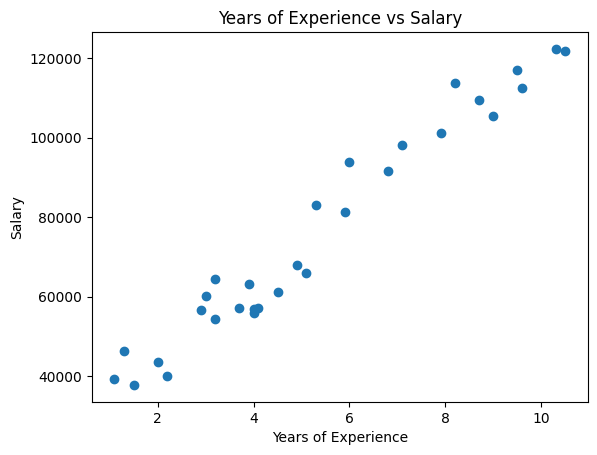

In [5]:
#Plot the data to see the relationship between the years of experience and the salary
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

Correlation between YearsExperience and Salary: 0.9782416184887599


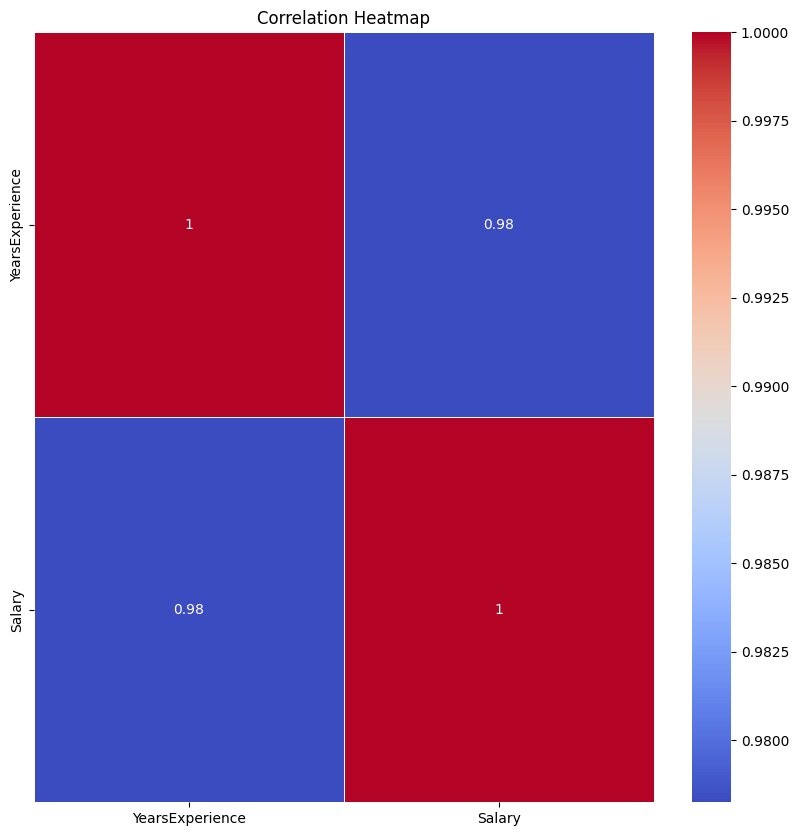

In [6]:
# calculate the correlation between the two columns
correlation = df['YearsExperience'].corr(df['Salary'])

print('Correlation between YearsExperience and Salary:', correlation)

# Use seaborn to create a heatmap of the correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Heatmap')
plt.show()


In the correlation matrix we can observe that the correlation between years of experience and salary is 0.98 meaning that there's a positive relationship between the two and that a linear regression model is a great fit to predict the salary of a worker given the salary years, given they work in the same environment as the one described in the dataset.

Mean Squared Error: 35207447.00483354
Root Mean Squared Error: 5933.586352690381


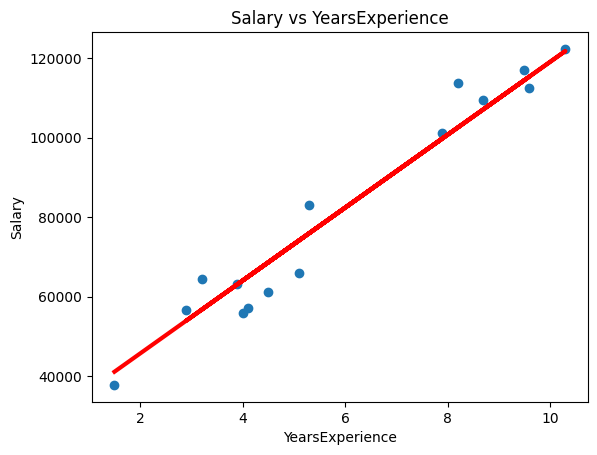

Intercept: 27275.40097799508
Coefficient: 9183.592437483361
The predicted salary for a person with 10 years of experience is $119111.33


c:\Users\aburr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# We'll now train a simple linear regression model to predict salary based on years of experience
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# Plot the test points
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary vs YearsExperience')
plt.show()

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

# Predict the salary for a person with 10 years of experience
years = 10
salary = model.predict([[years]])[0]
print(f'The predicted salary for a person with {years} years of experience is ${salary:.2f}')


In [8]:
#Test the model for accuracy
# Calculate the R-squared value
r2 = model.score(X_test, y_test)
print('R-squared:', r2)

# Calculate the Adjusted R-squared value
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R-squared:', adjusted_r2)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = 100 * (abs(y_test - y_pred) / y_test).mean()
print('Mean Absolute Percentage Error:', mape)

# Calculate the Mean Absolute Error (MAE)
mae = (abs(y_test - y_pred)).mean()
print('Mean Absolute Error:', mae)



R-squared: 0.952801713096894
Adjusted R-squared: 0.9491710756428089
Mean Absolute Percentage Error: 7.0577092504626915
Mean Absolute Error: 4898.738150685481


# Multiple Linear Regression
We can extend the Single Linear Regression model to consider multiple independent variables and a single dependent variable. 
In multiple linear regression, the relationship between the dependent variable and several independent variables is modeled using a linear equation. The general form of this equation can be written as:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon $$
Where:
- $y$ is the dependent variable we are trying to predict,
- $x_1, x_2, \ldots, x_n$ are the independent variables,
- $\beta_0, \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients that the model will estimate to best fit the data,
- $\beta_0 $ is the intercept (the value of $y $ when all $x $ are 0),
- $\epsilon $ is the error term, which accounts for the variability in $y $ that cannot be explained by the linear relationship with $x $.

The coefficients $\beta_1, \beta_2, \ldots, \beta_n $ represent the changes in the dependent variable for one unit change in the corresponding independent variable, assuming all other variables are held constant.


Let's now use another dataset from kaggle.com to demonstrate how to use the multiple linear regression. 

In [40]:
import numpy as np

#load the dataset
df = pd.read_csv('Student_Performance.csv')

# Display the first few rows of the dataset
display(df.head())

# Show basic statistics of the dataset  
df.info()


,Hours Studied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPapersPracticed,PerformanceIndex
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hours Studied                  10000 non-null  int64  
 1   PreviousScores                 10000 non-null  int64  
 2   ExtracurricularActivities      10000 non-null  object 
 3   SleepHours                     10000 non-null  int64  
 4   SampleQuestionPapersPracticed  10000 non-null  int64  
 5   PerformanceIndex               10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


We can see this data set includes 5 different variables: Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced and a Performance Index.

In [41]:
# Encode 'ExtracurricularActivities' using one-hot encoding
df = pd.get_dummies(df, columns=['ExtracurricularActivities'], drop_first=True)

# Check for and handle missing values
print(df.isnull().sum())


Hours Studied                    0
PreviousScores                   0
SleepHours                       0
SampleQuestionPapersPracticed    0
PerformanceIndex                 0
ExtracurricularActivities_Yes    0
dtype: int64


In [38]:
# Select features and the target variable
features = df.drop('PerformanceIndex', axis=1)
target = df['PerformanceIndex']

# Display the processed features and the first few rows
display(features.head())
display(target.head())

,Hours Studied,PreviousScores,SleepHours,SampleQuestionPapersPracticed,ExtracurricularActivities_No,ExtracurricularActivities_Yes
0,7,99,9,1,False,True
1,4,82,4,2,True,False
2,8,51,7,2,False,True
3,5,52,5,2,False,True
4,7,75,8,5,True,False


0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: PerformanceIndex, dtype: float64

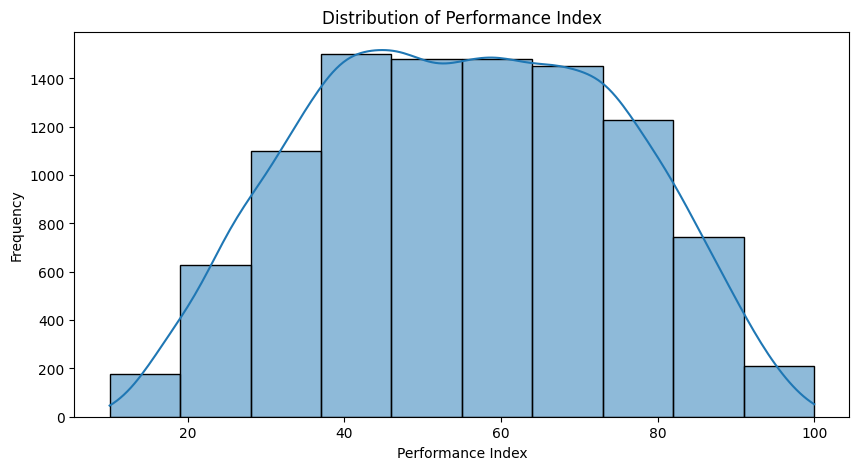

                               Hours Studied  PreviousScores  SleepHours  \
Hours Studied                       1.000000       -0.012390    0.001245   
PreviousScores                     -0.012390        1.000000    0.005944   
SleepHours                          0.001245        0.005944    1.000000   
SampleQuestionPapersPracticed       0.017463        0.007888    0.003990   
PerformanceIndex                    0.373730        0.915189    0.048106   

                               SampleQuestionPapersPracticed  PerformanceIndex  
Hours Studied                                       0.017463          0.373730  
PreviousScores                                      0.007888          0.915189  
SleepHours                                          0.003990          0.048106  
SampleQuestionPapersPracticed                       1.000000          0.043268  
PerformanceIndex                                    0.043268          1.000000  


In [42]:
#Lets plot some of the variables to explore potential relationships
plt.figure(figsize=(10, 5))
sns.histplot(df['PerformanceIndex'], bins=10, kde=True)  
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)




In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating R-squared and MSE
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# Displaying the coefficients of the model
coefficients = model.coef_



In [48]:
# Display model performance
print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Coefficients:', coefficients)

# Interpret the coefficients
coefficients_df = pd.DataFrame(coefficients, index=features.columns, columns=['Coefficient'])
coefficients_df.loc['Intercept'] = model.intercept_
display(coefficients_df)




R-squared: 0.9889832909573145
Mean Squared Error: 4.0826283985218526
Coefficients: [ 2.85248393  1.0169882   0.47694148  0.19183144 -0.30430834  0.30430834]


,Coefficient
Hours Studied,2.852484
PreviousScores,1.016988
SleepHours,0.476941
SampleQuestionPapersPracticed,0.191831
ExtracurricularActivities_No,-0.304308
ExtracurricularActivities_Yes,0.304308
Intercept,-33.617638


We can see here how the coefficients from our model independent variables end up impacting the final dependent value (Student Performance). For example we can see that for every hour studied, there's a positive ~2.83 increase in final performance or that for every extra hour of sleep a student gets, there's an improvement of ~0.48 in the final performance. 
With a R-squared score of 0.98 we have great accuracy for predicting data with our model. 

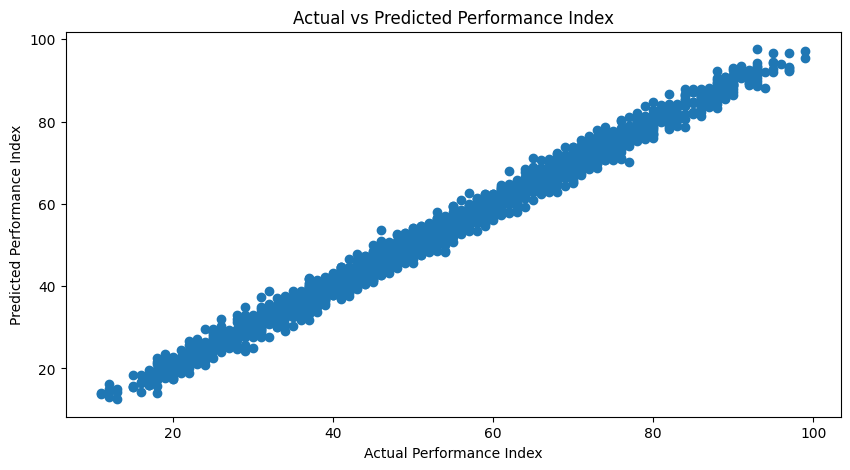

In [47]:
#plot the predicted values against the actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.show()  


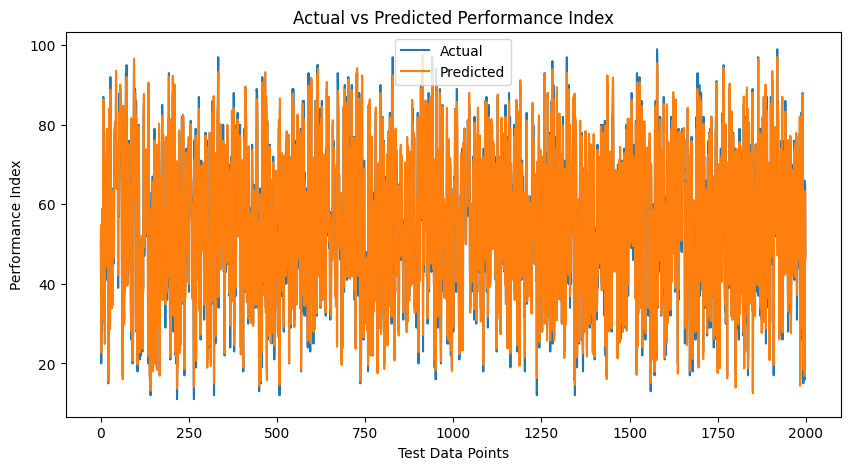

In [49]:
#Plot test data vs predicted data
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.legend()
plt.show()



On the past two plots we can see how accurate our model is in predicting data vs the actual test data we set apart when training our model. 

## In conclusion
Linear Regression in both its Single and Multiple versions is quite useful for making prediction based on data with assumed linearity. In this workbook we have seen how these models are built and trained and how they can be used to discover important insights not easily observable in the raw data. 
